<a href="https://colab.research.google.com/github/a-forty-two/DataSetsForML/blob/master/17_PandaVGG_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Our very own version of VGG implementation
# First let's check out how VGG looks like 
from keras.applications.vgg19 import VGG19
import numpy as np

model = VGG19()
model.summary()

574717952/574710816 [==============================] - 6s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [0]:
# Directory structure to follow for production training of model
# Objective: Lowest latency : Training is usually done in clusters -> data is distributed as well-> so keeping their names
# highly organized becomes very important to quickly reference them 
# Solution: keep data highly structured 
# Objective: Ease of bug detection
# Solution: follow hierarchy 
# Objective: Highly mobile code
# Solution: mention dependencies 


In [0]:
!ls

'16 cogni Directory for portable model training.PNG'   sample_data


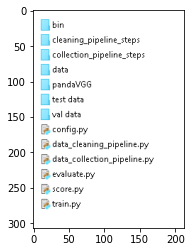

In [0]:
# Directory structure for pipeline
import cv2
x = cv2.imread('16 cogni Directory for portable model training.PNG')
import matplotlib.pyplot as plt
plt.imshow(x)

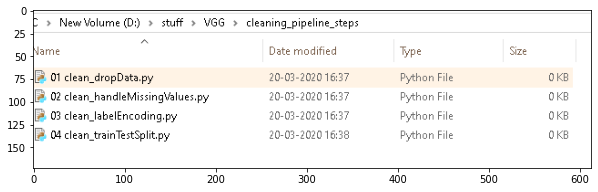

In [0]:
#inside a pipeline folder
import cv2
x = cv2.imread('16 cogni Directory for portable model training 1.PNG')
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(x)

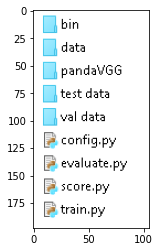

In [0]:
# Directory structure for standalone cleaning and training
import cv2
x = cv2.imread('16 cogni Directory for portable model training.PNG')
import matplotlib.pyplot as plt
plt.imshow(x)

#Directory Structure (Diagram above)

Config.py/ install.py : all installations, properties, constants, global variables, required for libraries used in program

example: !pip install tensorflow keras

example: import numpy as np

example: PI=3.1

example: system.globalvars.PATH = system.globalvars.PATH + 'some new dependency path' <example only>

train.py : actual program that uses 'MODEL class' and generates a 'MODEL object' as a result of training 

test.py : actual program that Scores the model after training

eval.py : Evaluates the model post training

data folder-> all our raw data (CSV, images, audio, text, URLs for HTTP written in excel or text files everything!)

This should be highly structured and hierarchial (more folders and more division, the better- more columns the better)

bin folder -> output of your activities- all your plots, the model.h5 or model.pickle, any other artifacts of training, cleaned data 

if cleaned data is too much -> created different folders inside data-> dirty and clean 

First keep data by default in dirty-> after transformations/manual cleaning/magic no. removal/outlier removal/ image augmentation/ encoding etc etc.. move to CLEAN data 


CLEAN DATA should contain data that can be used for ML/DL as it is. 

Test Data should contain CLEAN data for model testing 

Val Data -> validation data (if any)





'16 cogni Directory for portable model training 1.PNG'
'16 cogni Directory for portable model training.PNG'
'16 congi vgg 1.png'
 data
 pipeline_part1_handleNull.py
 preprocess_pipeline
 sample_data


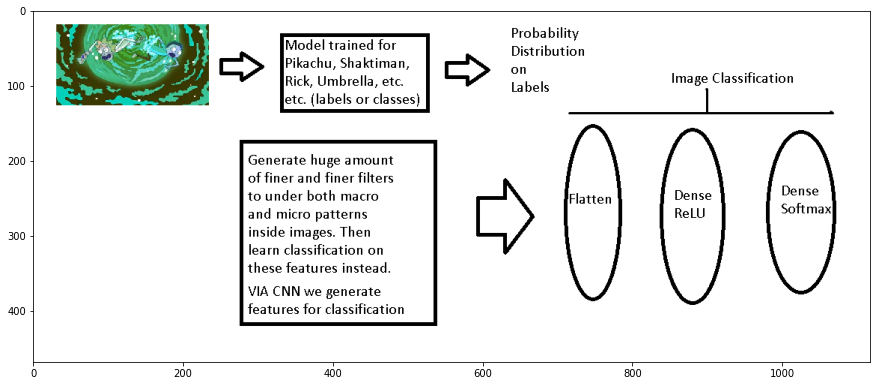

In [0]:
!ls
import cv2 
import matplotlib.pyplot as plt
x = cv2.imread('16 congi vgg 1.png')
plt.figure(figsize=(15,15))
plt.imshow(x)
# OBJECT DETECTION -> trying to detected pretrained objects in the images 

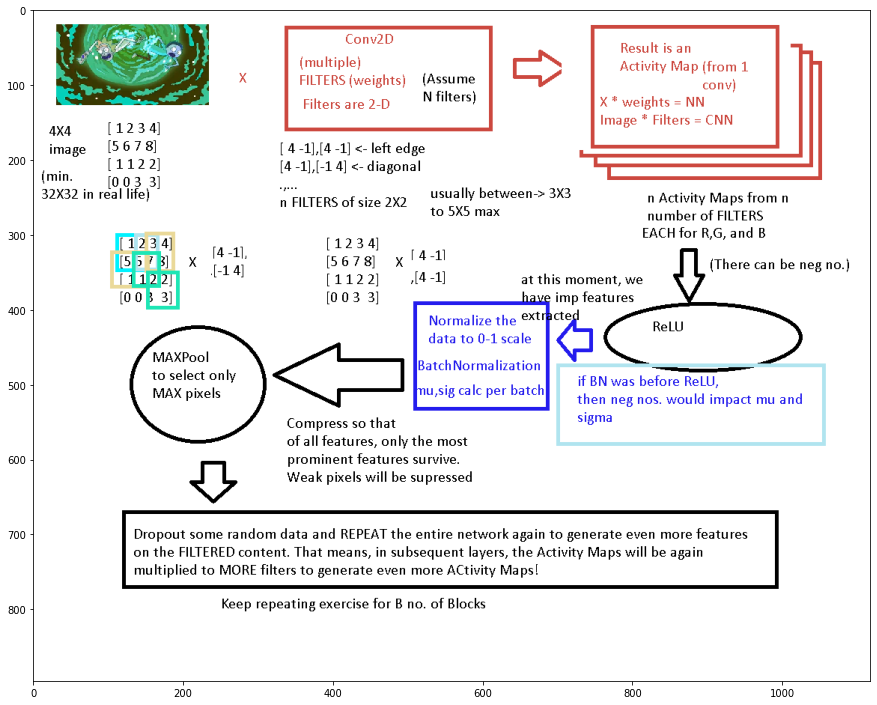

In [0]:
import cv2 
import matplotlib.pyplot as plt
x = cv2.imread('17 congi vgg 1.png')
plt.figure(figsize=(15,15))
plt.imshow(x)

In [1]:
# 1 image -> N activity maps -> divided into X batches. So each batch
# is of size-> N/X elements 
# so mu and sigma for N/X no. of elements will be calculated together 
# that way different activity map groups end up with diff values of MU and SIGMA
# hence generated very filter specific normalization, which is sufficiently
# fast also. HOWEVER, the complete benefits of BN is still under study
# there is a LOT of debate on how and where to use it!!!


# Creating a model for consumption
# In local machine: c:/prod/pandaVGG/PandaVGG.py
# ONLY the code to design the model- nothing else
# This is not tensorflow.keras, this is KERAS API
# its a wrapper on top of libraries like TF, Theano, CNTK
import numpy as np
from keras import backend
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
# for very large algos, such as VGG, running many instances of your algorithm can damange ram and other h/w also
# very least, other programs will suffer and face depleted performance 
# that is why we make sure that only 1 instance of such programs runs at any given time 
# such classes are called SINGLETONS 
# In python, singletons can be implemented by STATIC method
# ANY programming language -> STATIC -> your variable has the same lifecycle as rest of the program- unlike other variables
# it will not be deallocated when no longer needed
# as a result, its in shared memory and only 1 instance of it can exit
# even if many objects are created, they will still share only 1 common instance in the SHARED memory 
# observe: static method-> does not have 'self' object as reference. This is because self is to associate class with
  # current instance of method. SInce this is static and shared, it is not associated with 1 particular object. Hence
  # no self is required in static method. 
  # So given Input (w,h,d) and output (classes), we are designing our NN
class PandaVGG: # model.fit(), model.predict() ; for them you need object
  @staticmethod
  def create(width, height, depth, classes): # TF was CHANNELS_LAST -> depth is mentioned as the last value, after w&h
    model = Sequential()
    inputShape = (height, width, depth) # the expected shape as per TF
    # but what if this program is then run on some other framework? which follows channels_first instead?
    chanDim = -1 # CHANNELS_LAST set as default 
    # now check if some other library except TF or CNTK is running
    if backend.image_data_format() == "channels_first":
      inputShape = (depth, height, width) # this chan_dim is a measure of DEPTH of data-> so makes sense only for multidimension data, such as image or video
      chanDim = 1 # for Theano (if tf or CNTK is not running)
    # Design our network
    # FIRST BLOCK = Conv + ReLU + BN + MP + D
    model.add(Conv2D(32,(3,3), padding='same', input_shape=inputShape)) # all keras backends compatible
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=chanDim)) # Normalization needs to be along axis- R,G and B! 
    # After BN, the important FILTERED features are available now as WEIGHTS 
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Dropout(0.25)) 
    # Learning Layers -> Conv + ReLU + BN
    # that means, to increase the number of features, i need to repeat the Conv+ReLU+BN to generate more and more
    # features
    # MAX Pool is to compress, and Dropout -> randomly select features for partial learning 
    
    # BLOCK 2 should have slightly more features, because we have compressed and DROPPED the data!!! 
    # we should generate more activity maps henceforth to compensate for data loss 
    # BLOCK 2 = (Conv->Relu->BN)X2 + MP + D
    # LET X = Conv->Relu->BN
    # Block 2 = 2 X + MP + D
    # My network so far = Block 1 + Block 2
    # FeatureClassification = Flatten + Dense(ReLU) + Dense(SoftMax)
    # PandaVGG = X + MP + D +   ( 2 X + MP + D ) * no_of_times_you_want_to_repeat + FeatureClassification
    # First X -> got activity map for 100% of data (X=Conv+Relu+BN)
    # then Activity Maps are compressed and sent to subsequent layers (MaxPooling)
    # Dropout to learn about only a section of data (Dropout)
    model.add(Conv2D(64,(3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(64,(3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2))) # SMALLER pool size-> finer features selected -> BIGGER compression
    model.add(Dropout(0.25))

    # block 3
    model.add(Conv2D(128,(3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(128,(3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2))) # SMALLER pool size-> more data lost -> BIGGER compression
    model.add(Dropout(0.25))
    # block 4
    model.add(Conv2D(256,(3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(256,(3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2))) # SMALLER pool size-> more data lost -> BIGGER compression
    model.add(Dropout(0.25))
    #VGG has now become = block1 +block2+block3+block4 + FeatureClassification
    # VGG= X(32)+MP(3,3)+D+2X(64)+MP(2,2)+D+2X(128)+MP(2,2)+D+2X(256)+MP(2,2)+D+Flatten+DenseRelu+DenseSoftMax
    # Where X = Conv2D + ReLU + BN 
    # Our PandaVGG now has 32 layers

    #FINAL Classification block
    # ALL micro and macro features (FILTERsX Input = Activity Map) have been generated
    # SO FLATTEN out to bring all axises into same DIMENSION
    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation('relu'))
    # optional: EVEN more regularization
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    #regularization over, Classify using SOFTMAX
    model.add(Dense(classes))
    model.add(Activation('softmax'))
    return model 


    # IDEA behind designing our CNN 
    # FIRST -> LEARN pattern on all the data (via filters or convolutions), and break it into multi dimensions
    # some of those weights could be negative (BUT IMAGES DON't HAVE NEGATIVE PIXELS)! 
    # SECOND -> ADD a RELU layer to deactivate all negative values 
    # weights will be on various scales (thats how conv layer's math is built)
    # THIRD -> NORMALIZE the data 
    # COMPRESS THE IMAGE [THIS IS VERY CRITICAL. LOSE some amount of data, and keep only important features back]
    # FOURTH-> MaxPooling (COMPRESSION)
    # FIFTH -> DO THIS A FEW MORE TIMES, learning finer patterns on only important features
    # in next step, only the most important of important features will survive, and so on for every block of
    # repeatation added 
    # FINALLY, once happy with amount of filters and patterns understood on images, do the classification on 
    # the filtered data 
    # after maybe a few layers, add Dropout layer too? That way, we will learn finer patterns and different patterns
    # per epoch!

    # REGULAR IMAGE CLASSIFICATION (WEEK 2,Day 1): Flattening -> Dense(Relu) -> Dense( SOFTMAX )
    # GENERATE lots and lots of features with help of layers & layers of convolutions. 
    # Then just do a Flat->Dense(Relu)->Dense(Softmax) the general image classification 

    # what about images that are of different sizes, shapes, textures, formats etc etc?
    # NOT NN's problem-> NN is handcoded, cannot be a global people pleaser. Instead it will perform good for
    # a fixed type of input size
    # hence before passing images to this NN, we should manually clean and manipulate images 
 

    


Using TensorFlow backend.


In [0]:
# let's create the model, and look at the shape
model = PandaVGG.create(96,96,3,2)
model.summary()
# 32 X 3X3 
# 32 X 9 = 288 -> filters 
# 
# In interest of time (or lack of) built ResNet or VGG from Keras -> transfer learning 
# 3X3 -> 9 , For best patterns , stride = (X,Y) = for a row: (1,0), end of row-> reset to next row: (0,-1)


# Convolutional layers have 1 bias per filter (just like other networks have 1 bias per weight) 
# ((filter_area)+1) <- no. of weights generated per filter
# ((filter_area)+1) X no. of layers 
# (9 X3 +1)X 32 = 320 for 1 channel
#  9X32 X 3 + 32 = 
# MATHEMATICAL INDUCTION <- subject to form formulas given the data 
# ((FIlter size X INPUT_CHANNEL_DIMENSION_COUNT ) + bias) X no. of filters [HYPOTHESIS]
# After filters from Conv1 were created, there were no more RGB channels!!! there were only filters
# INPUT CHANNEL DIMENSION is what we need to multiply
# Conv1 -> 3 channels input -> R,G,B
# Conv1 = ( ( 3X3) X 3 channels ) + 1 bias) X 32 filters = 896, Hence verified for 1st case
# Conv2 -> 32 channels input -> 32 filters broken by the previous layer are the input for the new Conv!
# Conv2 = ( ( 3 X 3) X 32 channels) + 1 bias ) X 64 filters = 18496 # hence proved for 2nd Conv!
# Conv3 -> 64 inputs as channel dim
# Conv3 = ( (3X 3 )X 64 channels) + 1) X 128 = 73856
# Dense -> 1 bias per output_dimension
# Convolution -> 1 bias per filter
# no. of filters = output_dimension
# Hence PROVED!!!
# Parameter Formula for Conv2D in my PandaVGG is 
# ((FIlter size X INPUT_CHANNEL_DIMENSION_COUNT ) + bias) X no. of filters 
# No longer hypothesis, but a proven formula
#  
# Actual formula: ((shape of width of the filter*shape of height of the filter+1)*number of filters)
# 

# https://www.mathsisfun.com/algebra/mathematical-induction.html
# Mathematical Induction -> how to build FORMULAE to represent a situation
# Form (train) formula for 1 value, validate on another value, assume true for rest of them 
# Expected x -> ((filter_area)+1) 
# Dense -> in *w + b

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 96, 96, 32)        896       
_________________________________________________________________
activation_19 (Activation)   (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_20 (Activation)   (None, 32, 32, 64)       

In [0]:
# before training the model, process the image 
import matplotlib
matplotlib.use('Agg')
from sklearn.preprocessing import LabelBinarizer # label encoding, word2vec, One-hot, mult-hot
# LB converts output into a MATRIX of 1-hot values. Idea is that on image we may detect MULTIPLE objects!!!
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator, img_to_array
from sklearn.model_selection import train_test_split
from imutils import paths
import numpy as np
import random
import pickle # model.save -> ANOTHER way of exporting model -> Transfer weights separately!!! 
import cv2 
# To preprocess our images for NN

In [0]:
# i'm hardcoding user-variable factors because of GOOGLE COLAB, right way is to collect through USER os ENV variables
# if i was in desktop environment, i would have used COMMAND LINE ARGUMENTS 
UI_dataset = 'data' # hardcoded, but typically should have been selected by user through a UI or menu! 
UI_model_path= 'bin' # create a folder BIN to store the model 
UI_labels_binarized = 'bin' # if you binarize labels for a problem, export them so that the user importing your model
# also knows what the output stands for! 
UI_eval_metrics = 'metrics' # any metrics or plots you'd wish to calculate and save for comparison later 

In [0]:
# HYPERPARAMS 
#  not part of the same block above- Hyperparams are NOT user defined Inputs
HP_epochs = 100 
HP_init_lr = 1e-3 # initial learning rate for a custom optimizer 
HP_batch_size = 32
HP_image_dims = (96,96,3)


In [22]:
# my current dataset is raw images. They should be resized, processed, and augemented before being considered for NN. 

data = [] # preprocessed data will be inserted here
labels = []
myimages = sorted(list(paths.list_images(UI_dataset))) # from a folder, gets list of all images and sorts them 
# No use sorted? Then in order of appearance! FIRST COME FIRST SERVE! 
# shuffle the data to create randomness
random.seed(42)
random.shuffle(myimages)
myimages[:10]
# EVEN though, we didn't have any excel sheet as representation, by path name we can guess that folder name in path
# is the LABEL also
# so we can split the paths and get the label, and create our own dataframe!!!!


['data/pikachu/00000035.jpg',
 'data/pikachu/00000039.png',
 'data/shaktiman/Shaktiman 00000053.jpg',
 'data/pikachu/00000177.jpg',
 'data/shaktiman/Shaktiman 00000039.jpg',
 'data/shaktiman/Shaktiman 00000101.jpg',
 'data/pikachu/00000167.jpg',
 'data/pikachu/00000004.jpg',
 'data/pikachu/00000107.jpg',
 'data/pikachu/00000118.jpg']

In [0]:
import os
for impath in myimages:
  image = cv2.imread(impath)
  # RESIZE THE IMAGE
  resized = cv2.resize(image,(HP_image_dims[0],HP_image_dims[1]) )
  # convert from numerical 2-D structure to numerical array for further processing 
  imageData = img_to_array(resized)
  data.append(imageData)
  # THE NAME of path also contains the LABEL name - pikachu and shaktiman! 
  # may a good idea to extract the names of labels here itself 
  label = impath.split(os.path.sep)[-2]  # os.path.sep -> whatever OS is on, it's PATH SEPARATORS \ , / are added to the list
  # 'data/pikachu/00000120.jpg' -> ['data','pikachu','00000120.jpg']
  # -2 selected 2nd last word which is the FOLDER name 
  # this is taking advantage of heirarchy of file structure
  # why did we not select 1 instead? because i could have had sub folders!
  labels.append(label)

In [24]:
# data[0]
# labels[0] # pikachu so mostly white background
data[4] # FIRST IMAGE in NUMBER (img_to_array's output)
#labels[4]
# pikachu photos had white bg -> hence we saw a lot of 0s
# shaktiman had a dark background-> hence more of 255s


#NORMALIZATIOn
# we didn't do it as a part of loop-> because thru numpy we can execute it 1 statement!
# in loop it would be executed len(data) times thus leading to poor time execution
data = np.array(data, dtype='float') / 255.0 
# output binarize 
labels = np.array(labels)
lb = LabelBinarizer()
labels = lb.fit_transform(labels) # converting labels into Hot-encoded MATRIX
print(labels[0])
# pikachu's representation
print(labels[4])
# shaktiman's rep
# Label Encoding-> [0,1]
# label binarizing -> [ [0] , [1]]
# THIS IS NOT LABEL ENCODING-> quite ambiguous to understand unless you observe that values are actually matrices 
# Previous looked like SINGLE values because we had only 2 classes
# but in presence of multiple classes, now we can see this matrix forming
# [ Courage Pikachu Shaktiman] -> 1 hot encoded ROW 
# Unlike 1-hot encoding, label binarizing doesn't create new columns 


[0 1 0]
[0 0 1]


In [0]:
# now that we have all number and labels, TRAIN and TEST datasets must be created
trainx, testx, trainy, testy = train_test_split(data, labels, test_size=0.2, random_state=42)

In [0]:
# NOW AUGMENT THE IMAGE TO GENERATE ALL POSSIBLE SCENARIOS OF IMAGE TRANSFORMATION
# like blurring, zooming, shifting
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, 
                         zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
# THIS HASN'T ACTUALLY AUGMENT YOUR IMAGES-> THIS IS JUST A FUNCTION DEFINITION TO DO SO
# you need to apply it to your data for augmentation during TRAINING
# KERAS comes with a special training function for augmented data, called FIT_GENERATOR which tries to fit a 
# AUGMENTATION or LOGIC generator function of your data such as above instead of raw data 
# y = f(x) <- old NN
# y = f ( Augmentations(x) ) <- with ImageDataGenerator
# DOESn't change the SCALE of data 
# your data will remain either between your data limits or -1 to 1 due to trig function X your data 


# COPIES would mean actual files, these are in ram, but not as files 
# [ 0 1 1 2 2 3 4] => [[ 0 1 1 2 2 3 4], [[ 0 sin30 sin30 2sin30 2sin30 3sin30 4]]       ]

In [0]:
# hyperparam driven declaration -> highly dynamic model where you can twist and play for performance tuning
# you have 2 classes, i have 3-> always keep dynamic program
# custom optimizer
model = PandaVGG.create(HP_image_dims[0],HP_image_dims[1],HP_image_dims[2],len(lb.classes_)) 
opt = Adam(lr = HP_init_lr, decay=HP_init_lr/HP_epochs)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# By the time EPOCHs are over, a GOOD learning rate would have become 0 as per ADAM optimizer algorithm
# so we are saying that 'decay' or 'deaccelerate' LEARNING RATE each epoch by a constant factor so that by
# the end of fitting, LR becomes forcibly 0 and you will have best minima 
# http://www.science-campus.com/physics/mechanics/kinematics/chapter5/kinematics_5_1_g.php
# v = u + at # final_velocity = initial_velocity + acceration*time 
# FINAL_LEARNING_RATE = INITIAL_LEARNING_RATE + decayRate * EPOCHS 
# We need FINAL_LR -> 0 to arrive at best answer as per ADAM
# 0 = INIT_LR + decayRate * epochs
# decayRate = -INIT_LR/epochs 
# MINUS SIGN signifies that decay is negative and not positive
# Robotics, Computer Vision, Object tracking, guessing trajectories -> KINEMETICS is a CRITICAL SUBJECT 

# All animals are equal, but some are more equal than the others :) all subjects are critical that way. 


In [48]:
history = model.fit_generator(aug.flow(trainx, trainy, batch_size=HP_batch_size ),
                    validation_data=(testx,testy),
                    steps_per_epoch= len(trainx)//HP_batch_size, 
                    epochs=HP_epochs)
                    #HP_epochs)
# always save history 
# save_to_dir='aug' in aug.flow

Epoch 1/100
11/11 [==============================] - 15s 1s/step - loss: 0.2265 - acc: 0.9516 - val_loss: 0.0034 - val_acc: 1.0000
Epoch 2/100
11/11 [==============================] - 15s 1s/step - loss: 0.3825 - acc: 0.9347 - val_loss: 0.1456 - val_acc: 0.9667
Epoch 3/100
11/11 [==============================] - 16s 1s/step - loss: 0.1329 - acc: 0.9659 - val_loss: 0.1550 - val_acc: 0.9556
Epoch 4/100
11/11 [==============================] - 14s 1s/step - loss: 0.4109 - acc: 0.9084 - val_loss: 0.6792 - val_acc: 0.9111
Epoch 5/100
11/11 [==============================] - 15s 1s/step - loss: 0.5272 - acc: 0.9261 - val_loss: 0.2583 - val_acc: 0.9556
Epoch 6/100
11/11 [==============================] - 16s 1s/step - loss: 0.0862 - acc: 0.9716 - val_loss: 0.2103 - val_acc: 0.9667
Epoch 7/100
11/11 [==============================] - 15s 1s/step - loss: 0.2183 - acc: 0.9485 - val_loss: 0.1894 - val_acc: 0.9778
Epoch 8/100
11/11 [==============================] - 14s 1s/step - loss: 0.0643 - a

In [0]:
UI_model_path = UI_model_path + '/mymod.h5'
model.save(UI_model_path)

In [0]:
# Our model's output is binarized labels. We should also export those binarized labels so that classes can be
# understood by other users 
UI_labels_binarized = UI_labels_binarized +'/labels.binarized'
f = open(UI_labels_binarized, 'wb')
f.write(pickle.dumps(lb))
f.close()
# TRAINING script is complete 
#### END of train.py #################

In [0]:
##### Score.py ##########
# test your model

# import the model
# input an image -> from the user-> since this is notebook, we will have to hardcode this 
# preprocess it in precisely same steps in same order as during training the model
#      - resize 
#      - img_to_array
#      -  / 255 # till here done by us
#      - Agumented (This is done by network-> because network was fit on Aug.Flow)

# our test image contains more than 1 object our algo is trained for 
# our algo will suffer poor performance because we dont have enough
# training data. Minimal- 5 classes, each 500 images 
# DON't run in production below 3000 images of training 
# we are OK with poor performance just for training demo

import numpy as np
import imutils
import cv2
import pickle
import os
from keras.models import load_model
from keras.preprocessing.image import img_to_array
# Augmentor- the ImageDataGenerator is now inbuilt into the model

In [0]:
# Paramters to collect from user interface or command line
model= load_model(UI_model_path)
# loads -> load string
binarized_labels = pickle.loads(open( UI_labels_binarized, 'rb').read())
testImage = 'test/test2.png'

In [69]:
image = cv2.imread(testImage)
# copy of data, so that we have input preserved for later comparison
output = image.copy()
image = cv2.resize(image,(96,96)) # NOT array, but still numbers 
image = image.astype('float') / 255.0 # same as np.array(image, dtype='float')
print(image.shape)
image = img_to_array(image) 
print(image.shape)
image = np.expand_dims(image, axis=0) # SAME AS RESHAPING -> we are bringing down any additional dimensions to dimension 0 (if present)
print(image.shape)
#  1 2
#  3 4    -> normalize

# we did the same thing in SEQ-to-SEQ mapping also!! .reshape function! 
# this will also act like a SEQUENCE ID-> preferred tensorflow way of reading data 



#  1  2  3  4  -> normalize 
# in both above cases, only the SHAPE of normalization would be different, not the values post normalization

# finally, before passing it to the augmentor-> one extra step, make sure there are no other dimensions present
# JUST in case-> gifs, videos, a lot of type of data can contain additional dimensions 


(96, 96, 3)
(96, 96, 3)
(1, 96, 96, 3)


In [71]:
prediction = model.predict(image)[0]
print(prediction)
idx = np.argmax(prediction)
label = binarized_labels.classes_[idx]
print(label)
# VERY BAD DETECTION BECAUSE NOT ENOUGH IMAGES FOR TRAINING
# For this algo to work-> 5 classes with at least 250 images 

# we will build a crawler/web scrapper/spider/bot to download custom images in BULK
# then we can train the SAME model with a few thousand images 





[0.00088291 0.8064421  0.19267505]
pikachu


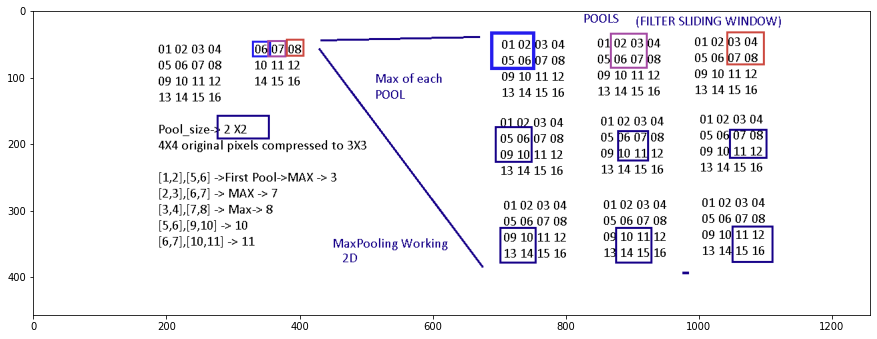

In [0]:
# 1 2 3 12 4 51 23 42 12 4 66 12 

# MaxPooling1D -> 3 window_size
# Consider 3 numbers in 1 iteration, and select MAX
# 123->3, 2,3,12->12   3,12,4->12   12,4,51->51, 4,51,23->51 
# 3 12 12 51 51 51 42 42 66 66 <- result of compressing above
import cv2 
import matplotlib.pyplot as plt
x = cv2.imread('17 cogni Pooling.png')
plt.figure(figsize=(15,15))
plt.imshow(x)
# MAX Pooling is shown below

Demo of Static method:

In [0]:
class ABC:
  def __init__(self):
    self.a = "hello"
  def getName(self):
    return self.a

a1 = ABC()
a2 = ABC()
a3 = ABC() 
# 3 different objects


class BCD: # IF all methods inside method were static-> then even after multiple objects, i would still consume memory only for 1 function!
# hence getting a singleton like behavior 
  @staticmethod
  def abc():
    print("hello world")

a4 = BCD()

3 Channels- R, G, B 

SARIMAX -> Decomposed our graph into Season, Trend, Residue!

We measured prediction separately on the 3 graphs, and then combined the result to get the actual the actual prediction.

We treat images the same way: make filters separately for R, G and B, and then combine the results in output layer

Besides RGB (light color), CMY -> Cyan, Magenta, Yellow (SOLID/INK color)


In [0]:
print(a1.getName() ) # this will work fine

hello


In [0]:
print(ABC.getName())# this should ideally be an error
# there is no object!

TypeError: ignored

In [0]:
print(BCD.abc()) # this will run abc without even creating an object of class BCD!!
# Statis methods do not require an object of a class to be executed

hello world
None


In [0]:
# BIOLOGY
# v=u+at, y=mx+c, trig, geome, GT
# Animal-> violated most of the physics concept we know. 
# Changed the way - Signals and Systems, Computer Vision, Thermodynamics, Color Theory, IOT
# SIGNALS ARE EVERYWHERE-> humans are just part of ONE type of evolution
# eyes-> see color -> light frequency [VIBGYOR- limited bandwidth]
# ears -> hear audio -> sound frequency [certain bandwidth]
# nose -> smell -> particle frequence [limited bandwidth]
# What if we could smell colors, hear smell? permutations of senses and signals? 
# Brain-> medula, corpus callosum, cerebrum, cerebellum -> which we thought had specific functions
# in case of damaged brain area, but healthy neurons, you can surgecially attache the healthy neuron
# to any other part of brain -> brain will retrain itself to use that nerve 
# area meant to hear-> taught/retrained to see! 
# NEURONS had variable and variable output and could be easily retrained for any sort of data!
# eyes -> rods, cones -> rods:depth, cones:color 
# 3 cones -> 2^3-1 = 7 colors 



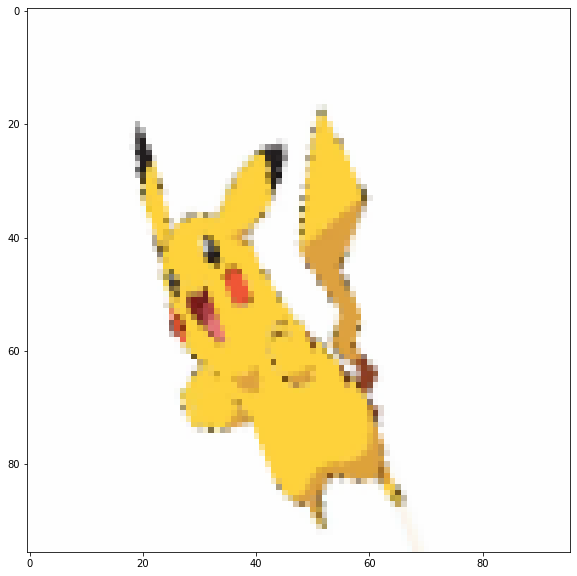

In [44]:
import cv2
x = cv2.imread('/content/sampleAugs/_102_8978.png')
import matplotlib.pyplot as plt
%matplotlib inline 
# this will include LOCAL env's version of lib rather than standard lib
plt.figure(figsize=(10,10))
plt.imshow(x)
# here we see blurring, rotation and shearing in play

In [46]:
myaugs = len(list(paths.list_images('aug')))
myaugs

357

In [47]:
len(trainx)

357